<a href="https://colab.research.google.com/github/ArcticFoox/optimization/blob/main/GD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Lecture(1분반)[05-17]*

# **수치 최적화** 알고리즘
- GD: 경사 하강 (Gradient Descent)
- Stochastic GD: 확률적 경사 하강
- Adam: Adaptive Moments (Hybrid: Momentum 방법 & RMSProp 방법)



# GD: Part-III


## 함수(예: 손실함수)의 그래프 표현
- 예: 2변수 함수 $f(x,y) = 3(x-2)^2 + (y-2)^2$

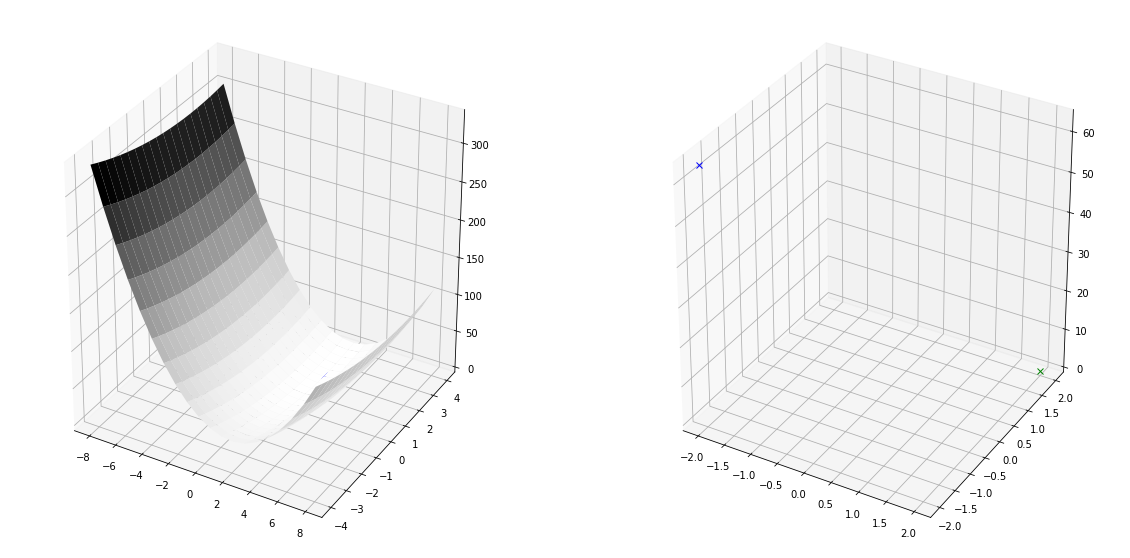

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수

# 정의역
xmin, xmax, xnum = -8.0, 8.0, 20
ymin, ymax, ynum = -4.0, 4.0, 20
x = np.linspace(xmin,xmax,xnum)
y = np.linspace(ymin,ymax,ynum)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

minima_ = np.array([[2], [2]]) # 손실함수를 최소화하는 (x,y) 값

fig, ax = plt.subplots(1,2, figsize=(20,10), subplot_kw={'projection':'3d'})
ax[0].plot_surface(X,Y,Z, cmap = 'Greys')
ax[0].plot(minima_[0],minima_[1],f(minima_[0],minima_[0]),'bx')
ax[1].plot(minima_[0],minima_[1],f(minima_[0],minima_[0]),'gx')
ax[1].plot([-2],[-2],f(-2,-2),'bx')
plt.show()


## GD: 실행 코드 예(1)
- 손실함수: 2변수 함수 $f(x,y) = 3(x-2)^2 + (y-2)^2$
- 초깃값: (-2,-2)
- 학습률: 0.25
- MaxIter: 10

In [ ]:
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt

f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수
grad_f_x = lambda x, y: 6 * (x-2) # 손실함수의 x에 대한 편미분
grad_f_y = lambda x, y: 2 * (y-2) # 손실함수의 y에 대한 편미분

x0 = np.array([-2., -2.]) # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률

print("step\t(x,y)\t\tf(x)")
print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(0, x0[0], x0[1], f(*x0)))

for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)]) # gradien 계산
    x1 = x0 - learning_rate * grad # 업데이트
    x0 = x1 #새로운 x값을 기존 x값에 대입
    print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(i+1, x0[0], x0[1], f(*x0)))

step	(x,y)		f(x)
00	(-2.0000,-2.0000) : 64.0000
01	(4.0000,0.0000) : 16.0000
02	(1.0000,1.0000) : 4.0000
03	(2.5000,1.5000) : 1.0000
04	(1.7500,1.7500) : 0.2500
05	(2.1250,1.8750) : 0.0625
06	(1.9375,1.9375) : 0.0156
07	(2.0312,1.9688) : 0.0039
08	(1.9844,1.9844) : 0.0010
09	(2.0078,1.9922) : 0.0002
10	(1.9961,1.9961) : 0.0001


## 관찰: GD의 특성(약점)
- **초깃값** 선택에 대한 **민감성**
- **학습률** 선택에 대한 **민감성**

### 경우1: **초깃값** 선택 관련 이슈
- 예: $f(x) = x*sin(x)$
 - 정의역(-1,7) 에서의 최솟값 위치: x=4.9xx
 - 고정된 선택: 학습률(=0.25), MaxIter(=6)
    - 초깃값 선택(1): **2.5  (--> green)**
    - 초깃값 선택(2): **1.5  (--> red)**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산

grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x에 관한 미분


print('Case: x0=2.5')
x0 = 2.5 # 초깃값 선택(1)
xopt1, _, paths1 = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)
print()

print('Case: x0=1.5')
x0 = 1.5 # 초깃값 선택(2)
xopt2, _, paths2 = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

# 그래프
plt.plot(x, y, 'k-')
plt.plot(paths1, f(paths1), 'go:', markerfacecolor='none') # 초깃값 선택(1)
plt.plot(paths2, f(paths2), 'r^:', markerfacecolor='none') # 초깃값 선택(2)

for k, point in enumerate(paths1):
    plt.text(point, f(point), '$x_{0}$'.format(k+1),
            verticalalignment='bottom')

for k, point in enumerate(paths2):
    plt.text(point, f(point), '$x_{0}$'.format(k+1),
            verticalalignment='top')

plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Case: x0=2.5


NameError: ignored

### 경우2: **학습률** 선택 관련 이슈
- 예: $f(x) = x*sin(x)$
 - 초깃값: 2.5
 - 학습률
   - small: 0.05 (--> blue)
   - large: 1.0  (--> red)
   - inbetween: 0.25 (--> green)

In [ ]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분

x0 = 2.5 # 초깃값

print('Case: learning rate = 0.05')
print("step\t(x)\tf(x)")
xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=0.05, MaxIter=6)

plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'bo:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k+1),
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

print('Case: learning rate = 1.00')
print("step\t(x)\tf(x)")
xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=1.00, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ro:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k+1),
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

print('Case: learning rate = 0.25')
print("step\t(x)\tf(x)")
xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'go:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k+1),
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Case: learning rate = 0.05
step	(x)	f(x)


NameError: ignored

# **GD: Part-IV**

## GD를 적용할 문제: 선형회귀모델 & GD

### Target 자료 만들기
- 비교용: 선형적인 자료  $y=0.5x+1.0$
- 실전용: random number(난수) 이용하여 생성된 자료
  - 난수 생성을 위해 이용된 함수: **numpy.random**.seed(), **numpy.random**.rand("data 길이")


- **개별 실험시 설정**
  - my_seed: 원하는 값으로 설정 (단, 320은 제외함)

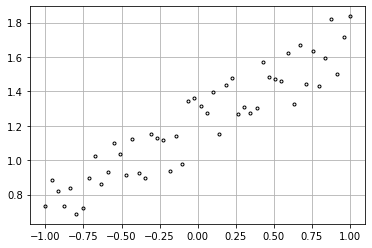

In [ ]:
# Target function
import numpy as np
import matplotlib.pyplot as plt

my_seed = 500  #개별 실험시: 320이 아닌 my_seed 선택
## my_seed 선택 예
# (1) 320: 참고도서 [T-2]에 제시된 예와 동일하게 만들기 위한 seed
# (2) 320이 아닌 원하는 값 선택
# (3) seed 지정하지 않고 'np.random.seed()'로 설정해도 ok

#np.random.seed(my_seed)
np.random.seed()

x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0  #f(x_train): 설정한 직선(0.5 * x + 1.0 )에 놓인 자료 생성
#y_train = f(x_train)  # 비교용:
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train)) # x_train 과 y_train 의 선형관계를 약하게 만드는 과정
plt.plot(x_train, y_train, '.k', markerfacecolor='none')
plt.grid()
plt.show()

### GD 적용
- 선형회귀 곡선 형태: $y=ax+b$
- GD 적용을 위해 필요한 요소
  - 손실함수
  - 손실함수의 gradient

In [ ]:
# 손실함수
def loss(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
      val += (a * x_train[i] + b - y_train[i])**2
    return val/N #평균 내기도 하고 그냥 써도됨 여기서는 평균을 내기 위해서 N으로 나눠줌

# 손실함수의 a에 대한 편미분
def loss_grad_a(a, b):

    N = len(x_train)
    val = 0.0
    for i in range(N):
      er = a * x_train[i] + b - y_train[i]
      val += er * x_train[i]*2
    return val/N

# 손실함수의 b에 대한 편미분
def loss_grad_b(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
      er = a * x_train[i] + b - y_train[i]
      val += er*2
    return val/N


### 검토(시각화): 예시
- 시각화를 위해 사용할 모듈
  - "from matplotlib.patches import Rectangle"
    - 웹자료(1): [Matplotlib: Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
    - 웹자료(2): [Matplotlib: box for error bar](https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py)

-예시: 선택된 (w, b) = (-4, -1)
 - w: 선형회귀곡선의 기울기
 - b: 선형회귀곡선의 x-절편

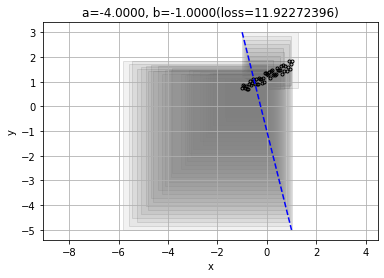

In [ ]:
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = loss.__name__
    plt.plot(x_train, y_train, '.k', markerfacecolor='none') # train date 그리기
    plt.plot(x_train, w * x_train + b, '--b') # 예측된 선형회귀곡선 그리기
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy),                            ## corner point
                                        w * xx + b - yy, w * xx + b - yy,    ## width, height
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.title("a={:1.2f}, b={:1.2f}({}={:5.4f})".format(w, b, loss_name, loss(w,b)))
    plt.title("a={:1.4f}, b={:1.4f}({}={:5.8f})".format(w, b, loss_name, loss(w,b)))


# 예: 선택된 (w,b)=(-4,-1)
visualize_l2(-4, -1, x_train, y_train, loss)
plt.show()

### GD 실행 및 시각화(+검토)

### [Step-1] 함수 'steepest_descent_2D' 정의

In [ ]:
def steepest_descent_2D(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]

    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])     ## 2변수 함수로서의 'loss function'에 대한 gradient 계산 과정
        x1 = x0 - learning_rate * grad
        fval = func(*x1)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)

    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

### [Step-2] 함수 'steepest_descent_2D' 실행
- 개별 실험을 통해 살펴볼 내용

  (1) 초깃값 선택에 따른 결과의 차이
  
  (2) 학습률 선택에 따른 결과의 차이

In [ ]:
## 초깃값(w0) 선택 (개인별: 3개의 다른 초깃값 선택)
a0, b0 = -4.0, -1.0
w0 = np.array([a0, b0]) # 초깃값
## 학습률(learning_rate) 선택 (개인별: 3개의 다른 학습률 선택)
chosen_LR = 0.5

wopt, fopt, paths, fval_paths = steepest_descent_2D(loss, loss_grad_a, loss_grad_b, w0, learning_rate=chosen_LR, MaxIter=30)

### [Step-3] 함수 'steepest_descent_2D' 실행 결과: 시각화
- 선택된 단계에서의 '예측된 선형회귀 곡선' & '대응되는 오차' 검토(시각화)

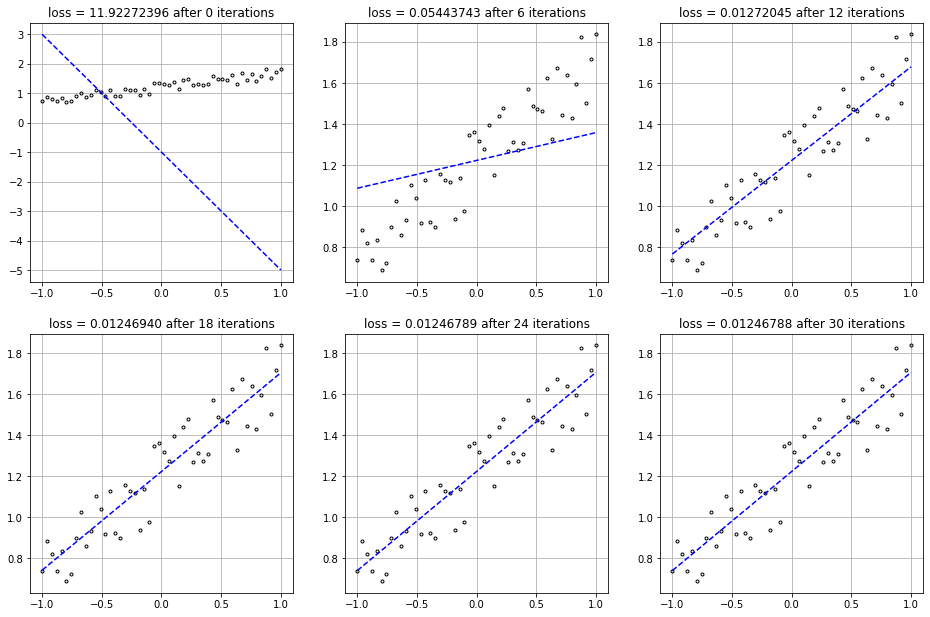

In [ ]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):  #spaing:6
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, paths[0, i] * x_train + paths[1, i], 'b--')
    plt.grid()
    plt.title('loss = {:5.8f} after {:d} iterations'.format(fval_paths[i], i))
    k+=1
plt.show()

### [Step-4] 함수 'steepest_descent_2D' 이용 --> 선형회귀곡선 찾기
  - 선택된 단계에서의 '예측된 선형회귀 곡선' & '대응되는 오차' 검토(시각화: 박스형 오차 표현)

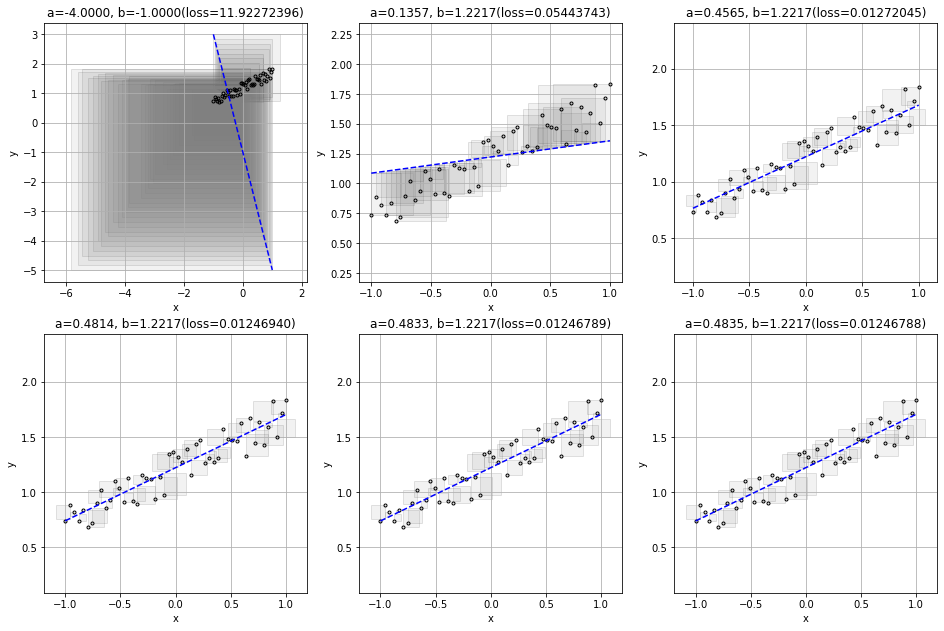

In [ ]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    ai, bi = paths[0:2, i]
    visualize_l2(ai, bi, x_train, y_train, loss)
    k+=1
plt.show()